In [1]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image
#print(os.listdir("../input"))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.
C:\Users\welcome\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\welcome\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\welcome\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\welcome\anaconda3\lib\site-packages\tensorflow\python\framework\d

In [2]:
mainDIR = os.listdir('C:/Users/welcome/Desktop/chest_xray/input/chest_xray/chest_xray')
print(mainDIR)

['.DS_Store', 'test', 'train', 'val']


In [8]:
train_folder='C:/Users/welcome/Desktop/chest_xray/input/chest_xray/chest_xray/train/'
val_folder = 'C:/Users/welcome/Desktop/chest_xray/input/chest_xray/chest_xray/val/'
test_folder ='C:/Users/welcome/Desktop/chest_xray/input/chest_xray/chest_xray/test/'

In [9]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

1343
normal picture title:  IM-0598-0001.jpeg
pneumonia picture title: person1225_bacteria_3180.jpeg


Text(0.5, 1.0, 'Pneumonia')

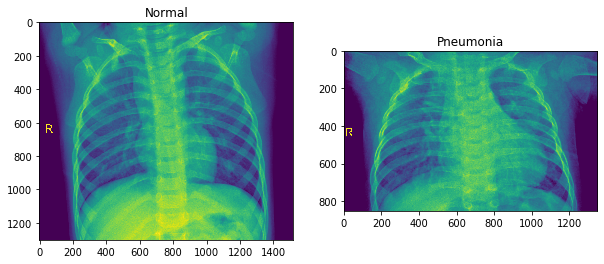

In [10]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

In [11]:
# let's build the CNN model

cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
num_of_test_samples = 600
batch_size = 32

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory('C:/Users/welcome/Desktop/chest_xray/input/chest_xray/chest_xray/train/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory('C:/Users/welcome/Desktop/chest_xray/input/chest_xray/chest_xray/val/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory('C:/Users/welcome/Desktop/chest_xray/input/chest_xray/chest_xray/test/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [15]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [27]:
cnn_model = cnn.fit_generator(training_set,
                         steps_per_epoch = 10,
                         epochs = 5,
                         validation_data = validation_generator,
                         validation_steps = 10)


Epoch 1/5
10/10 [==============================] - 23s 2s/step - loss: 0.2653 - accuracy: 0.8750 - val_loss: 0.2892 - val_accuracy: 0.8750
Epoch 2/5
10/10 [==============================] - 23s 2s/step - loss: 0.1704 - accuracy: 0.9375 - val_loss: 0.4750 - val_accuracy: 0.7500
Epoch 3/5
10/10 [==============================] - 28s 3s/step - loss: 0.2375 - accuracy: 0.9156 - val_loss: 0.5034 - val_accuracy: 0.7500
Epoch 4/5
10/10 [==============================] - 26s 3s/step - loss: 0.2556 - accuracy: 0.8969 - val_loss: 0.8366 - val_accuracy: 0.6250
Epoch 5/5
10/10 [==============================] - 23s 2s/step - loss: 0.2627 - accuracy: 0.9000 - val_loss: 0.3602 - val_accuracy: 0.7500


In [28]:
test_accu = cnn.evaluate_generator(test_set,steps=10)

In [29]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 77.8124988079071 %


In [42]:
Y_pred = cnn.predict_generator(test_set, 20)
y_pred = Y_pred>0.6

In [43]:
print(y_pred)

[[ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 

In [41]:
confusion_matrix(test_set.classes, y_pred, labels=[0, 1])

array([[ 87, 147],
       [155, 235]], dtype=int64)

In [38]:
classification_report(test_set.classes, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.37      0.22      0.28       234\n           1       0.62      0.77      0.69       390\n\n    accuracy                           0.57       624\n   macro avg       0.50      0.50      0.48       624\nweighted avg       0.53      0.57      0.54       624\n'

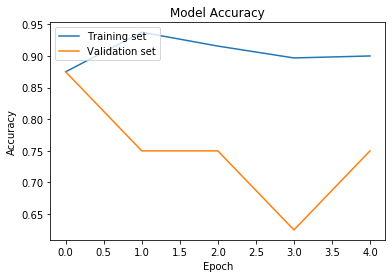

In [35]:
# Accuracy 
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

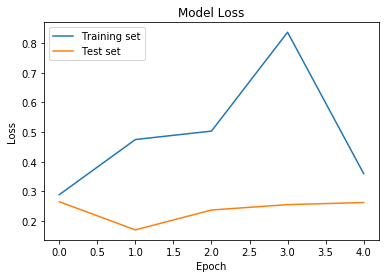

In [36]:
# Loss 

plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()